In [2]:
import os
import warnings
import numpy as np
import xarray as xr
import proplot as pplt
pplt.rc['figure.dpi'] = 100
warnings.filterwarnings('ignore')

In [3]:
FILEDIR    = '/global/cfs/cdirs/m4334/sferrett/monsoon-sr/data/splits'
MAXSAMPLES = 100000
RNG        = np.random.default_rng(42)

In [4]:
splits = {
    'Train':xr.open_dataset(f'{FILEDIR}/train.h5',engine='h5netcdf'),
    'Validation':xr.open_dataset(f'{FILEDIR}/valid.h5',engine='h5netcdf'),
    'Test':xr.open_dataset(f'{FILEDIR}/test.h5',engine='h5netcdf')}

labels  = {
    'lf':'Land Fraction (0-1)',
    'pr':'Precipitation Rate (mm/hr)',
    'bl':'$\mathit{B_L}$ (m/s$^2$)',
    'cape':'$CAPE_L$ (K)',
    'subsat':'$SUBSAT_L$ (K)',
    'capeproxy':r'$\theta_{e}$(surface) - $\theta_{e}$* (K)',
    'subsatproxy':r'$\theta_{e}$* - $\theta_{e}$ (K)',
    't':'Temperature (K)',
    'q':'Specific Humidity (kg/kg)'}

In [5]:
def subsample(da,maxsamples=MAXSAMPLES,rng=RNG):
    values = da.values.ravel()
    values = values[np.isfinite(values)]
    if values.size>maxsamples:
        values = rng.choice(values,size=maxsamples,replace=False)
    return values

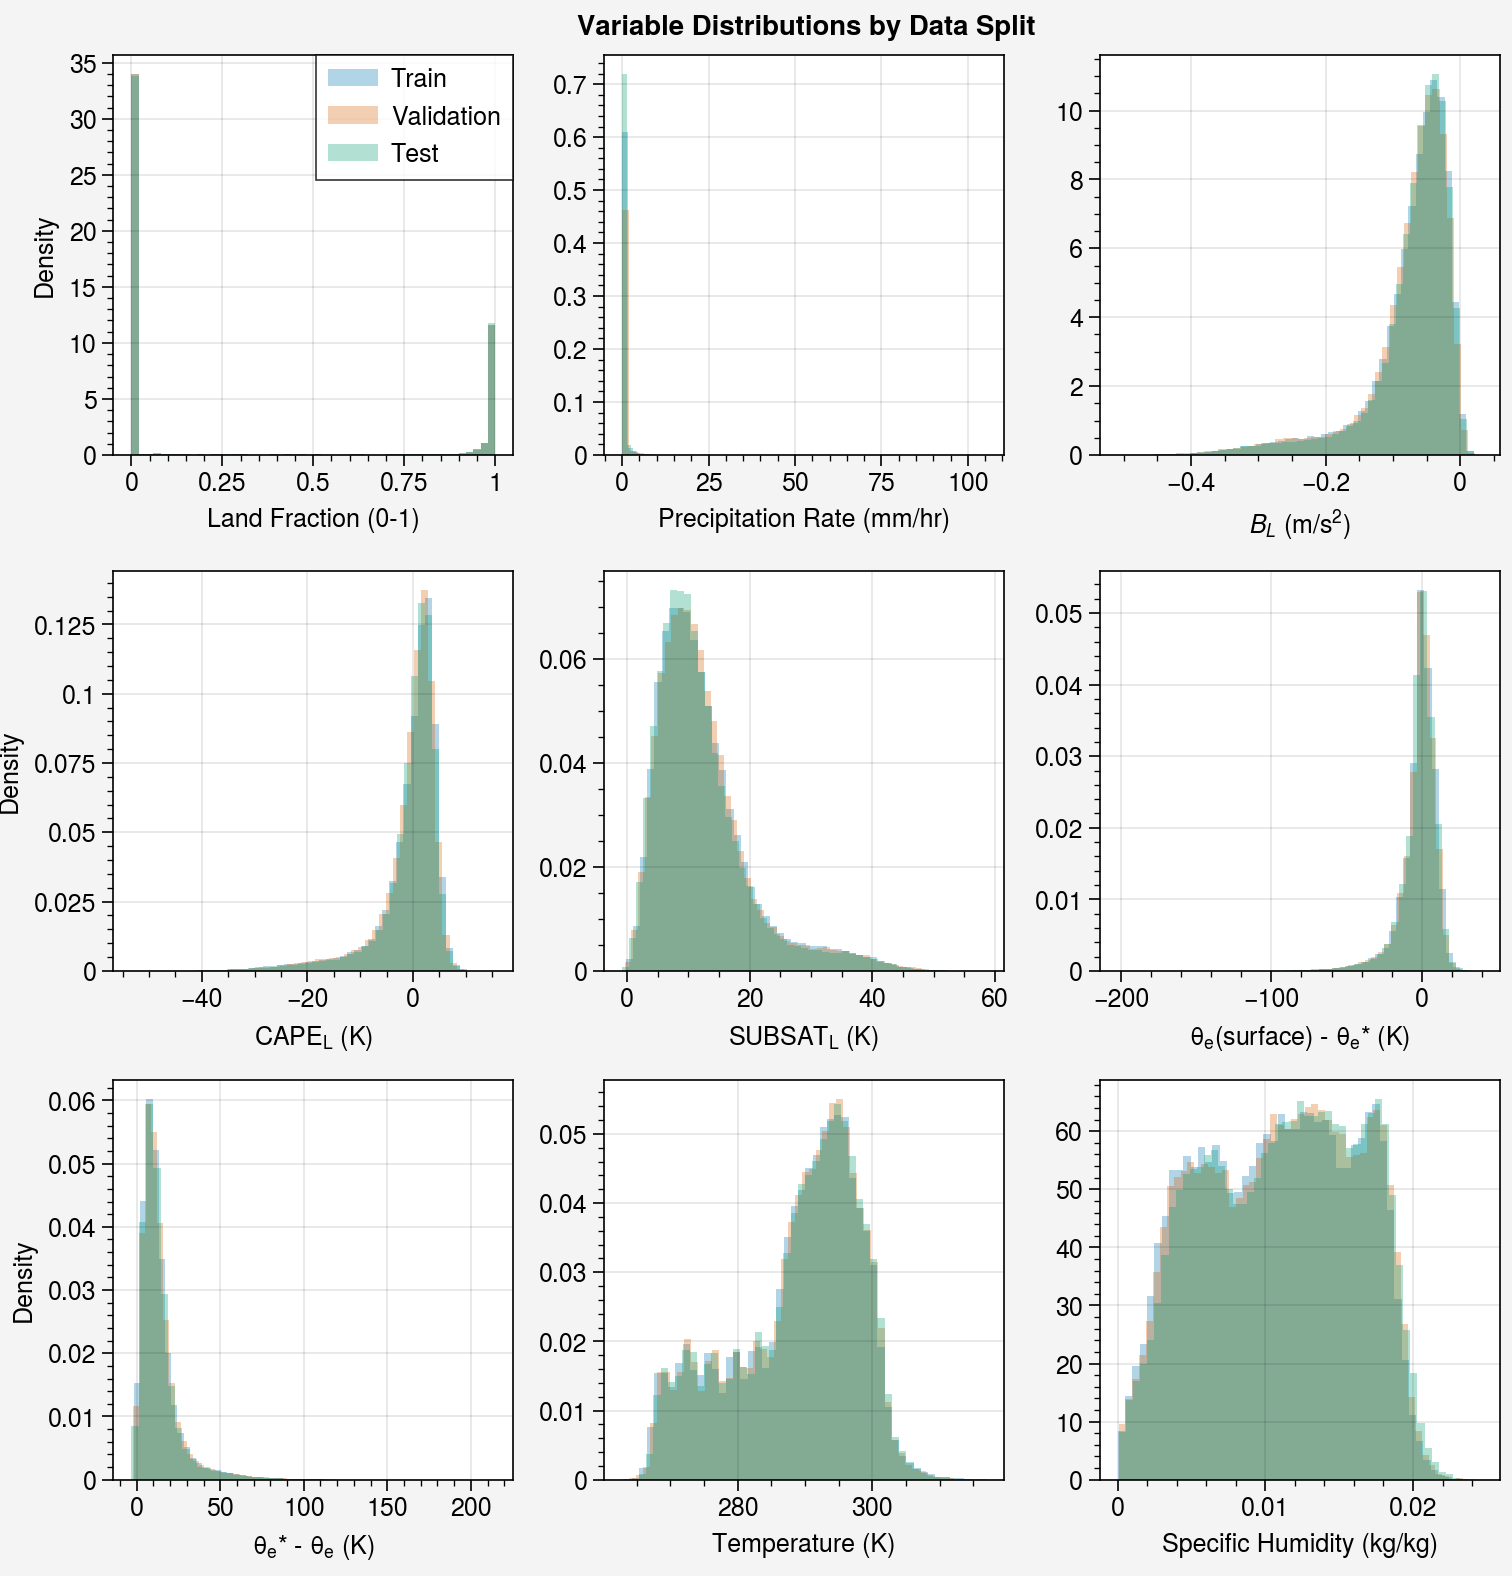

In [6]:
fig,axs = pplt.subplots(nrows=3,ncols=3,refwidth=2,share=False)
axs.format(suptitle='Variable Distributions by Data Split')
axs[:,0].format(ylabel='Density')
for i,(varname,description) in enumerate(labels.items()):
    for splitname,ds in splits.items():
        values = subsample(ds[varname])
        axs[i].hist(values,bins=50,density=True,alpha=0.3,label=splitname)
        axs[i].format(xlabel=description)
        del values
axs[0].legend(loc='ur',ncols=1)
pplt.show()